![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## 1. Libraries

To start, let's load those libraries that we need

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime

## 2. We prepare the data

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 28x28 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [2]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
y_train_label = y_train

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


We obtain an array with all the labels of CIFAR10

In [6]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

x_train_scaled,x_val_scaled, x_test_scaled = x_train / 255.0,x_val/255, x_test / 255.0

In [7]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train_scaled.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test_scaled.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val_scaled.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


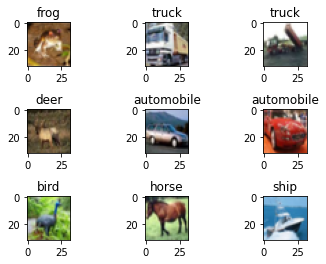

In [8]:
# Lets paint a sample of the images of MNIST

print('Train: X=%s, y=%s' % (x_train_scaled.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test_scaled.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

## 3.1 Model1: simple neural network


In [23]:
model = ks.Sequential(name='simple_nn')

model.add(ks.layers.Flatten(input_shape=(32,32,3)))
model.add(ks.layers.Dense(120, activation="relu"))
model.add(ks.layers.Dense(60, activation="relu"))
model.add(ks.layers.Dense(30, activation="relu"))
model.add(ks.layers.Dense(15, activation="relu"))
model.add(ks.layers.Dense(10, activation="softmax"))

model.summary()

Model: "simple_nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 120)               368760    
                                                                 
 dense_10 (Dense)            (None, 60)                7260      
                                                                 
 dense_11 (Dense)            (None, 30)                1830      
                                                                 
 dense_12 (Dense)            (None, 15)                465       
                                                                 
 dense_13 (Dense)            (None, 10)                160       
                                                                 
Total params: 378,475
Trainable params: 378,475
Non-train

In [24]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training


In [38]:
t = time.perf_counter()

In [25]:
history = model.fit(x_train_scaled, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_scaled, y_val))

Epoch 1/20
79/79 [==============================] - 1s 12ms/step - loss: 2.1133 - accuracy: 0.2107 - val_loss: 2.0234 - val_accuracy: 0.2439
Epoch 2/20
79/79 [==============================] - 1s 7ms/step - loss: 1.9181 - accuracy: 0.3003 - val_loss: 1.8717 - val_accuracy: 0.3222
Epoch 3/20
79/79 [==============================] - 1s 8ms/step - loss: 1.8297 - accuracy: 0.3376 - val_loss: 1.8456 - val_accuracy: 0.3295
Epoch 4/20
79/79 [==============================] - 1s 7ms/step - loss: 1.7809 - accuracy: 0.3548 - val_loss: 1.8218 - val_accuracy: 0.3397
Epoch 5/20
79/79 [==============================] - 1s 7ms/step - loss: 1.7557 - accuracy: 0.3651 - val_loss: 1.7752 - val_accuracy: 0.3597
Epoch 6/20
79/79 [==============================] - 1s 7ms/step - loss: 1.7191 - accuracy: 0.3830 - val_loss: 1.7496 - val_accuracy: 0.3670
Epoch 7/20
79/79 [==============================] - 1s 7ms/step - loss: 1.6853 - accuracy: 0.3963 - val_loss: 1.7942 - val_accuracy: 0.3623
Epoch 8/20
79/79 [=

In [40]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:00:41.925923


### Evaluation


In [26]:
Model_scores ={}

In [27]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 43.820


In [28]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

Our test accuracy for this model is 49% which is not good at all but not so bad for the simlets version of a neural network. Let's say it's a good start

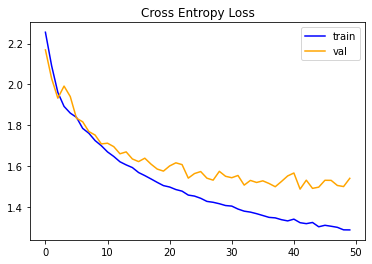

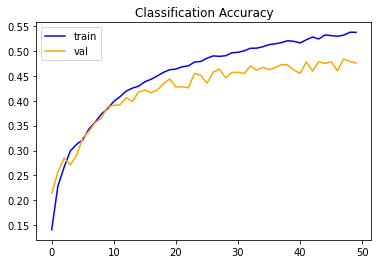

In [42]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

The validation loss is a bit larger than the test loss but there is no sign of overfitting

In [43]:
predictions = model.predict(x_test)

In [44]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


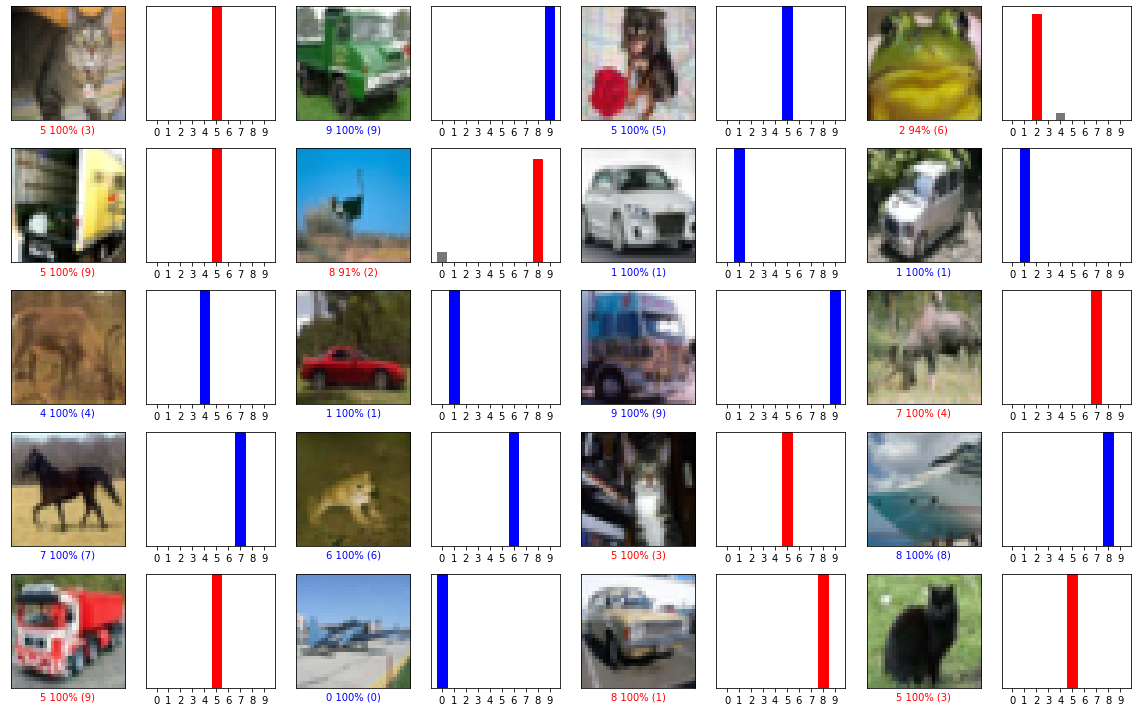

In [45]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

This model is clearly bad, as we can see that it makes very strange predictions

## 3.2 Model2: simple neural network2


For this model I will try to do a fully connected layer after the input layer, then divide the number of inputs by 2 at each layer

In [88]:
model = ks.Sequential(name='simple_nn2')

model.add(ks.layers.Flatten(input_shape=(32,32,3)))
model.add(ks.layers.Dense(3072, activation="relu"))

model.add(ks.layers.Dense(1536, activation="relu"))
model.add(ks.layers.Dense(768, activation="relu"))
model.add(ks.layers.Dense(384, activation="relu"))
model.add(ks.layers.Dense(192, activation="relu"))
model.add(ks.layers.Dense(96, activation="relu"))
model.add(ks.layers.Dense(48, activation="relu"))
model.add(ks.layers.Dense(24, activation="relu"))
model.add(ks.layers.Dense(12, activation="relu"))
model.add(ks.layers.Dense(10, activation="softmax"))

model.summary()

Model: "simple_nn2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_43 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_44 (Dense)            (None, 1536)              4720128   
                                                                 
 dense_45 (Dense)            (None, 768)               1180416   
                                                                 
 dense_46 (Dense)            (None, 384)               295296    
                                                                 
 dense_47 (Dense)            (None, 192)               73920     
                                                                 
 dense_48 (Dense)            (None, 96)                1

In [89]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training


In [48]:
t = time.perf_counter()

In [90]:
history = model.fit(x_train_scaled, y_train, epochs=50, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_scaled, y_val))

Epoch 1/50
79/79 [==============================] - 2s 23ms/step - loss: 2.2934 - accuracy: 0.1365 - val_loss: 2.2221 - val_accuracy: 0.1627
Epoch 2/50
79/79 [==============================] - 1s 17ms/step - loss: 2.1462 - accuracy: 0.1870 - val_loss: 2.0829 - val_accuracy: 0.2154
Epoch 3/50
79/79 [==============================] - 1s 18ms/step - loss: 2.0136 - accuracy: 0.2429 - val_loss: 1.9878 - val_accuracy: 0.2491
Epoch 4/50
79/79 [==============================] - 1s 17ms/step - loss: 1.9354 - accuracy: 0.2736 - val_loss: 1.9352 - val_accuracy: 0.2699
Epoch 5/50
79/79 [==============================] - 1s 17ms/step - loss: 1.8768 - accuracy: 0.2978 - val_loss: 1.9105 - val_accuracy: 0.2967
Epoch 6/50
79/79 [==============================] - 1s 17ms/step - loss: 1.8382 - accuracy: 0.3200 - val_loss: 1.8484 - val_accuracy: 0.3167
Epoch 7/50
79/79 [==============================] - 1s 17ms/step - loss: 1.7975 - accuracy: 0.3429 - val_loss: 1.7854 - val_accuracy: 0.3546
Epoch 8/50
79

### Evaluation


In [50]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 47.670


In [91]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

Here we get more or less the same results, I can already see that adding dense layers to my simple nn, will not improve my results by a lot

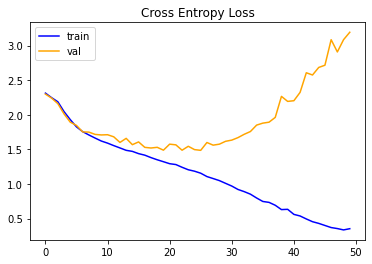

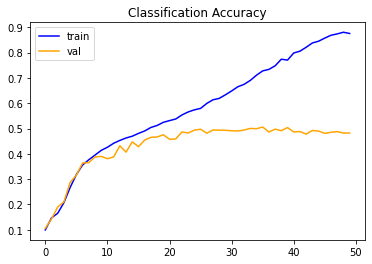

In [51]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

There is some overfitting, at first the validation and test lost are the same but then the validation loss goes through the roof

## 3.3 Model3: Convultional nn

In this model I will add three convulsional layers to my previous model, including one kernel with strides

In [101]:
model = ks.Sequential(name ='cnn1')

model.add(ks.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu',
                           input_shape=(32,32,3))) 
model.add(ks.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=2,
                           activation='relu'))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(120, activation='relu'))
model.add(ks.layers.Dense(60, activation='relu'))
model.add(ks.layers.Dense(30, activation='relu'))
model.add(ks.layers.Dense(15, activation='relu'))

model.add(ks.layers.Dense(10, activation='softmax')) 

model.summary()

Model: "cnn1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 flatten_7 (Flatten)         (None, 4096)              0         
                                                                 
 dense_53 (Dense)            (None, 120)               491640    
                                                                 
 dense_54 (Dense)            (None, 60)                7260      
                                                                 
 dense_55 (Dense)            (None, 30)                1830   

In [102]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training


In [ ]:
t = time.perf_counter()

In [103]:
history = model.fit(x_train_scaled, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_scaled, y_val))

Epoch 1/20
79/79 [==============================] - 3s 26ms/step - loss: 2.0497 - accuracy: 0.2415 - val_loss: 1.8917 - val_accuracy: 0.3252
Epoch 2/20
79/79 [==============================] - 2s 19ms/step - loss: 1.7140 - accuracy: 0.3860 - val_loss: 1.6682 - val_accuracy: 0.4022
Epoch 3/20
79/79 [==============================] - 2s 20ms/step - loss: 1.5955 - accuracy: 0.4252 - val_loss: 1.5685 - val_accuracy: 0.4340
Epoch 4/20
79/79 [==============================] - 2s 20ms/step - loss: 1.5039 - accuracy: 0.4601 - val_loss: 1.5388 - val_accuracy: 0.4482
Epoch 5/20
79/79 [==============================] - 2s 20ms/step - loss: 1.4260 - accuracy: 0.4860 - val_loss: 1.4342 - val_accuracy: 0.4799
Epoch 6/20
79/79 [==============================] - 2s 20ms/step - loss: 1.3629 - accuracy: 0.5069 - val_loss: 1.4434 - val_accuracy: 0.4759
Epoch 7/20
79/79 [==============================] - 2s 20ms/step - loss: 1.3098 - accuracy: 0.5279 - val_loss: 1.3579 - val_accuracy: 0.5045
Epoch 8/20
79

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:02:51.048212


### Evaluation


In [107]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 58.850


In [105]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

Our test accuracy is almost 60 % which is a 15% increase from our previous model. Just adding some convulsional layer has improved considerably the model

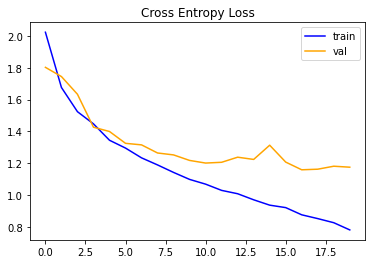

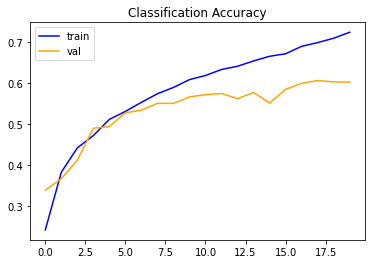

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

The validation loss is again decreasing a bit faster and more consistenntly but there is no clear sign of overfitting


In [ ]:
predictions = model.predict(x_test)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


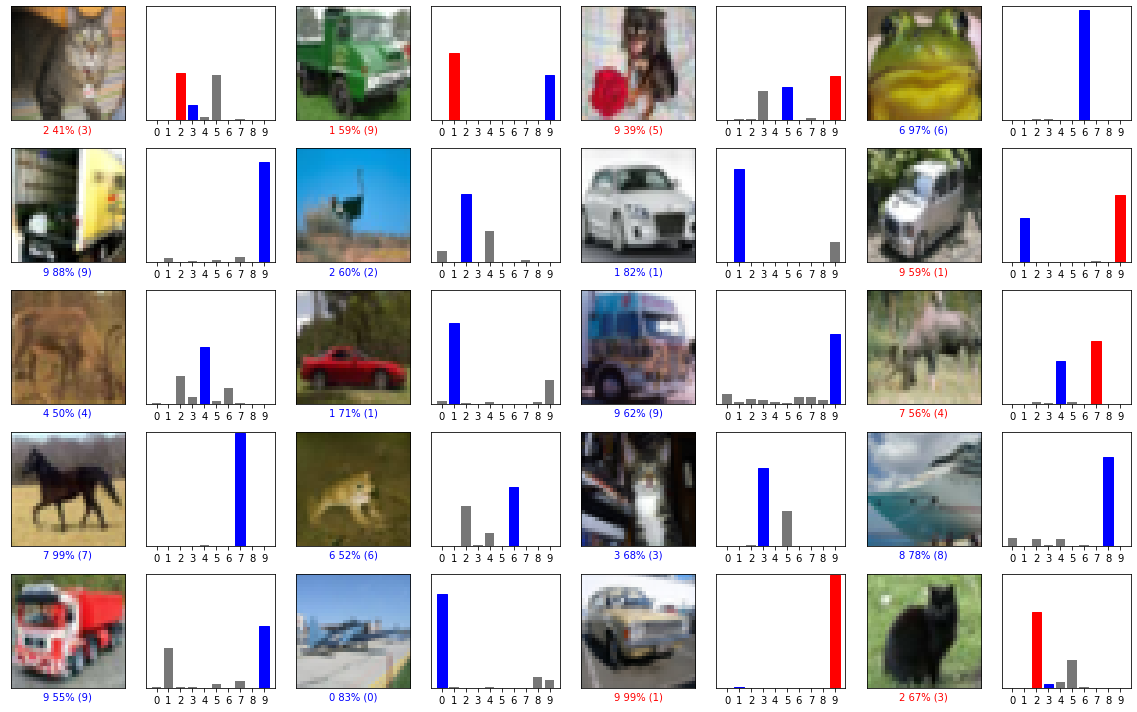

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 650
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start, predictions[i+start], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

This model is still not very good but clearly better. Also the mistakes are more understandable from a human point of view

## 3.4 Model4: VGG16 replication 

In this model I will add pooling and I will more ore less replicate the VGG16 model



In [127]:
model = ks.Sequential(name ='VGG_replication')

model.add(ks.layers.Conv2D(filters=4,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu',
                           input_shape=(32,32,3))) 
model.add(ks.layers.Conv2D(filters=4,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.MaxPooling2D((2,2)))
model.add(ks.layers.Conv2D(filters=8,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.Conv2D(filters=8,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.MaxPooling2D((2,2)))
model.add(ks.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.MaxPooling2D((2,2)))
model.add(ks.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.Conv2D(filters=32,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.MaxPooling2D((2,2)))
model.add(ks.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           padding ='same',
                           strides=1,
                           activation='relu'))
model.add(ks.layers.MaxPooling2D((2,2)))
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(10, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax')) 

model.summary()

Model: "VGG_replication"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 4)         112       
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 4)         148       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 8)         296       
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 8)         584       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                              

In [128]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training


In [54]:
t = time.perf_counter()

In [129]:
history = model.fit(x_train_scaled, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_scaled, y_val))

Epoch 1/20
79/79 [==============================] - 4s 38ms/step - loss: 2.2848 - accuracy: 0.1004 - val_loss: 2.2402 - val_accuracy: 0.1022
Epoch 2/20
79/79 [==============================] - 2s 25ms/step - loss: 2.1928 - accuracy: 0.1003 - val_loss: 2.1307 - val_accuracy: 0.0995
Epoch 3/20
79/79 [==============================] - 2s 25ms/step - loss: 2.0869 - accuracy: 0.1006 - val_loss: 2.0525 - val_accuracy: 0.0999
Epoch 4/20
79/79 [==============================] - 2s 25ms/step - loss: 2.0070 - accuracy: 0.1006 - val_loss: 2.0233 - val_accuracy: 0.0994
Epoch 5/20
79/79 [==============================] - 2s 25ms/step - loss: 1.9554 - accuracy: 0.1002 - val_loss: 1.9995 - val_accuracy: 0.0999
Epoch 6/20
79/79 [==============================] - 2s 25ms/step - loss: 1.8919 - accuracy: 0.0999 - val_loss: 1.8793 - val_accuracy: 0.1005
Epoch 7/20
79/79 [==============================] - 2s 31ms/step - loss: 1.8346 - accuracy: 0.1005 - val_loss: 1.8089 - val_accuracy: 0.1002
Epoch 8/20
79

In [56]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:00:48.853530


### Evaluation


In [130]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 10.324


In [131]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

Suprisingly our accuracy for this model is way worse than for the previous ones, I suspect that it's because our inputs have much less resolution (32*32) that the one the vgg model was trained on (128*128)
> Indented block



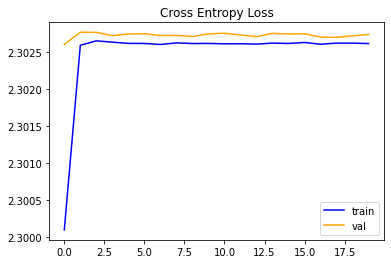

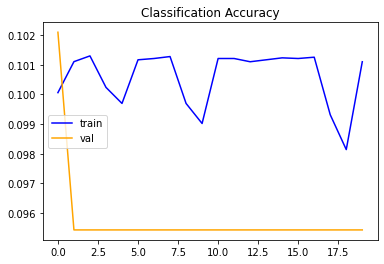

In [58]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

The validation loss is again decreasing a bit faster and more consistenntly but there is no clear sign of overfitting


We can see that this model is rubbish



## 3.5 Model5: cnn with pooling, drop out and early stopping

Because the vgg replication did not perform as I expected, I will create improve my prior cnn model with some inspiration of the vgg, I will also be adding max pooling, drop outs and callbacks, to extract the best optimal version of this model regardless of the number of epochs


In [10]:
model = ks.Sequential(name="cnn2")

model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.4))

model.add(ks.layers.Flatten()) 
model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

model.summary()

Model: "cnn2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                              

In [11]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Callbacks

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### Training


In [66]:
t = time.perf_counter()

In [13]:
from gc import callbacks
history = model.fit(x_train_scaled, y_train, epochs=50, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_scaled, y_val),
                    callbacks = [callback_loss, callback_accuracy])

Epoch 1/50
79/79 [==============================] - 15s 51ms/step - loss: 1.9892 - accuracy: 0.2580 - val_loss: 1.7136 - val_accuracy: 0.3616
Epoch 2/50
79/79 [==============================] - 3s 42ms/step - loss: 1.6134 - accuracy: 0.3956 - val_loss: 1.4815 - val_accuracy: 0.4537
Epoch 3/50
79/79 [==============================] - 3s 42ms/step - loss: 1.4214 - accuracy: 0.4757 - val_loss: 1.3109 - val_accuracy: 0.5203
Epoch 4/50
79/79 [==============================] - 3s 40ms/step - loss: 1.2523 - accuracy: 0.5401 - val_loss: 1.2413 - val_accuracy: 0.5429
Epoch 5/50
79/79 [==============================] - 3s 40ms/step - loss: 1.1416 - accuracy: 0.5891 - val_loss: 1.0467 - val_accuracy: 0.6265
Epoch 6/50
79/79 [==============================] - 3s 40ms/step - loss: 1.0469 - accuracy: 0.6258 - val_loss: 0.9544 - val_accuracy: 0.6659
Epoch 7/50
79/79 [==============================] - 3s 40ms/step - loss: 0.9729 - accuracy: 0.6551 - val_loss: 0.9136 - val_accuracy: 0.6824
Epoch 8/50
7

### Evaluation


In [14]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 78.730


In [15]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

NameError: ignored

This model is the best I have so far, my intuition is that the vgg cnn is to complex fo our type of data, thus a simpler version of the vgg structure yields better results


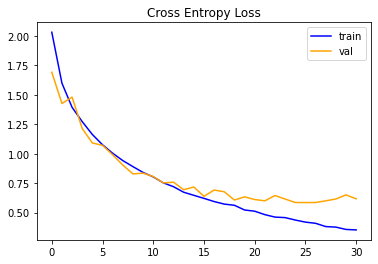

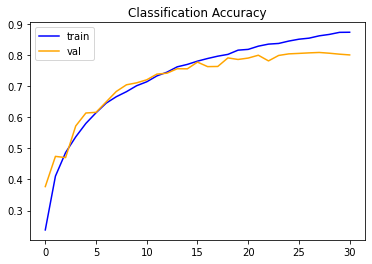

In [69]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

No sign of overfitting

## 3.6 Model6: cnn with pooling, drop out, early stopping and Batchnormalization

Because the vgg replication did not perform as I expected, I will create improve my prior cnn model with some inspiration of the vgg, I will also be adding max pooling, drop outs and callbacks, to extract the best optimal version of this model regardless of the number of epochs


In [ ]:
model = ks.Sequential(name = 'cnn_BatchNorm')

model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.4))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

In [ ]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### Training


In [ ]:
t = time.perf_counter()

In [ ]:
from gc import callbacks
history = model.fit(x_train_scaled, y_train, epochs=50, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_scaled, y_val),
                    callbacks = [callback_loss, callback_accuracy])

Epoch 1/50
79/79 [==============================] - 5s 56ms/step - loss: 1.6856 - accuracy: 0.3887 - val_loss: 3.4599 - val_accuracy: 0.0997
Epoch 2/50
79/79 [==============================] - 4s 51ms/step - loss: 1.2273 - accuracy: 0.5533 - val_loss: 2.7995 - val_accuracy: 0.0997
Epoch 3/50
79/79 [==============================] - 4s 52ms/step - loss: 1.0207 - accuracy: 0.6346 - val_loss: 3.0958 - val_accuracy: 0.1810
Epoch 4/50
79/79 [==============================] - 4s 52ms/step - loss: 0.8811 - accuracy: 0.6844 - val_loss: 2.8262 - val_accuracy: 0.2442
Epoch 5/50
79/79 [==============================] - 4s 52ms/step - loss: 0.7916 - accuracy: 0.7158 - val_loss: 2.3685 - val_accuracy: 0.3100
Epoch 6/50
79/79 [==============================] - 4s 53ms/step - loss: 0.7121 - accuracy: 0.7448 - val_loss: 1.7719 - val_accuracy: 0.4564
Epoch 7/50
79/79 [==============================] - 4s 53ms/step - loss: 0.6605 - accuracy: 0.7661 - val_loss: 1.0133 - val_accuracy: 0.6565
Epoch 8/50
79

With early stopping their are 29 Epoch

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Training time:', elapsed_time)

Training time: 0:02:20.719359


### Evaluation


In [ ]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 81.780


In [ ]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

By adding Batchnormalization, the model has now reached the target performance of 80%.


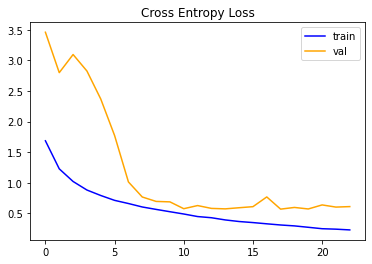

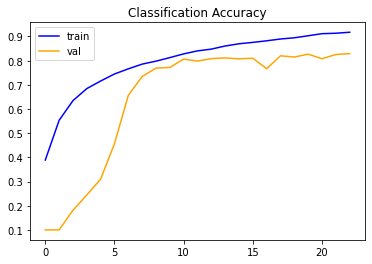

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

For some reason, the tarin loss is much smaller in the first epochs but then the validation loss catches up progressively

## 3.7 Model7: cnn with data augmentation

For this model I will introduce Data augmentation to my best model

In [69]:
model = ks.Sequential(name='cnn_DA')

model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.4))

model.add(ks.layers.Flatten()) 
model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [70]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Callbacks

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow(
    x_train,  
    y_train, 
    batch_size= 512
)

### Training


In [ ]:
t = time.perf_counter()

In [73]:
from gc import callbacks

history = model.fit(train_generator, epochs=100,
                    use_multiprocessing=False,  
                    validation_data=(x_val_scaled, y_val), 
                    callbacks=[callback_loss, callback_accuracy])

Epoch 1/100
79/79 [==============================] - 22s 266ms/step - loss: 1.7480 - accuracy: 0.0984 - val_loss: 2.9509 - val_accuracy: 0.0000e+00
Epoch 2/100
79/79 [==============================] - 21s 269ms/step - loss: 1.3474 - accuracy: 0.0954 - val_loss: 3.1153 - val_accuracy: 0.0000e+00
Epoch 3/100
79/79 [==============================] - 22s 282ms/step - loss: 1.1838 - accuracy: 0.0958 - val_loss: 3.9101 - val_accuracy: 0.1431
Epoch 4/100
79/79 [==============================] - 20s 259ms/step - loss: 1.0709 - accuracy: 0.0985 - val_loss: 3.1119 - val_accuracy: 0.0304
Epoch 5/100
79/79 [==============================] - 21s 262ms/step - loss: 0.9968 - accuracy: 0.0998 - val_loss: 2.1845 - val_accuracy: 0.0775
Epoch 6/100
79/79 [==============================] - 20s 254ms/step - loss: 0.9248 - accuracy: 0.1015 - val_loss: 1.1852 - val_accuracy: 0.1417
Epoch 7/100
79/79 [==============================] - 23s 293ms/step - loss: 0.8680 - accuracy: 0.1010 - val_loss: 0.7735 - val_a

KeyboardInterrupt: ignored

### Evaluation


In [ ]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 5.910


In [ ]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

Surprisingly this model performs much much worse than the original one without data augmenattion let's investigate further to find out why this is happening

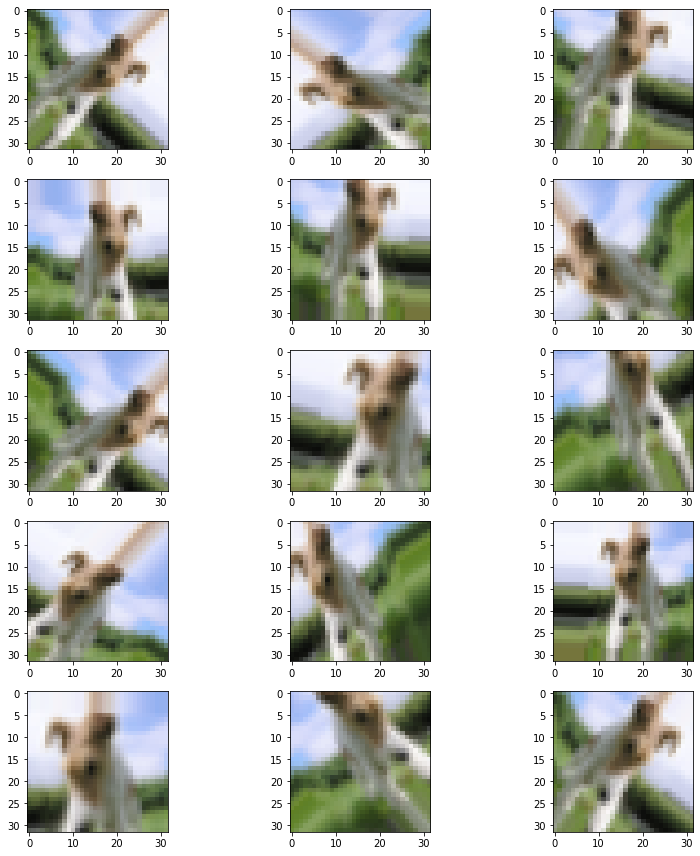

In [ ]:
# Visualasing a sample of the augmented data
import random
sample = random.choice(range(0,4999))

example_generator = train_datagen.flow(
    x_train[sample:sample+1],
    y_train[sample:sample+1],
    batch_size=1
)

plt.figure(figsize=(12, 12))
for i in range(0,15):
    plt.subplot(5, 3, i+1)
    for X,y in example_generator:
        image = X[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

From this sample I can see that even me as a human, have some difficulty identifyng the object, maybe it's because of the zoom. It might be that the transformations of our images causes the output to be invalid data

## 3.8 Model8: VGG transfer learning 

For this model I will use transfer learning to implement the VGG model on our data. I will freeze all parameters of the model

In [ ]:
from tensorflow.keras.applications import vgg16
vgg = vgg16.VGG16(include_top=False, weights='imagenet',input_shape= (32,32,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Setting a new Flattened layer in the last layer

from tensorflow.keras.models import Model

output = vgg.layers[-1].output
new_output_layer = ks.layers.Flatten()(output)
vgg_model = Model(vgg.input, new_output_layer)

In [ ]:
# Setting all the parameters as non trainable
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False


In [ ]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer type', 'Name of layer', 'Trainable?'])

,Layer type,Name of layer,Trainable?
0,<keras.engine.input_layer.InputLayer object at...,input_4,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [ ]:
# Getting VGG features of our data 

def getVGG16Features(model, input_imgs):
    return model.predict(input_imgs)

x_train_post_vgg16 = getVGG16Features(vgg_model, x_train_scaled)
x_val_post_vgg16 = getVGG16Features(vgg_model, x_val_scaled)
x_test_post_vgg16 = getVGG16Features(vgg_model, x_test_scaled)

In [ ]:
# Forming the last layers of the model 
model = ks.Sequential(name='VGG_TF1')

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(512, activation='relu', input_shape=(512,)))
model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

In [ ]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### Training


In [ ]:
from gc import callbacks
history = model.fit(x_train_post_vgg16, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_post_vgg16, y_val),
                    callbacks = [callback_loss, callback_accuracy])

Epoch 1/20
79/79 [==============================] - 1s 7ms/step - loss: 1.5565 - accuracy: 0.4510 - val_loss: 1.3005 - val_accuracy: 0.5434
Epoch 2/20
79/79 [==============================] - 0s 5ms/step - loss: 1.2393 - accuracy: 0.5651 - val_loss: 1.2488 - val_accuracy: 0.5612
Epoch 3/20
79/79 [==============================] - 0s 5ms/step - loss: 1.1545 - accuracy: 0.5946 - val_loss: 1.1964 - val_accuracy: 0.5825
Epoch 4/20
79/79 [==============================] - 0s 5ms/step - loss: 1.1008 - accuracy: 0.6169 - val_loss: 1.1943 - val_accuracy: 0.5775
Epoch 5/20
79/79 [==============================] - 0s 5ms/step - loss: 1.0551 - accuracy: 0.6311 - val_loss: 1.1307 - val_accuracy: 0.6085
Epoch 6/20
79/79 [==============================] - 0s 5ms/step - loss: 1.0058 - accuracy: 0.6481 - val_loss: 1.1266 - val_accuracy: 0.6080
Epoch 7/20
79/79 [==============================] - 0s 5ms/step - loss: 0.9628 - accuracy: 0.6643 - val_loss: 1.1457 - val_accuracy: 0.6055
Epoch 8/20
79/79 [==

### Evaluation


In [ ]:
_, acc = model.evaluate(x_test_post_vgg16, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 61.220


In [ ]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

Our results are worse than the best model we have


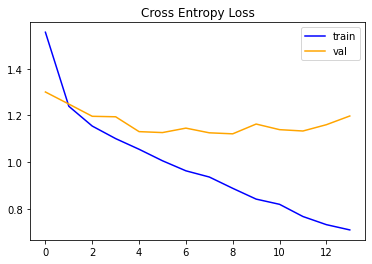

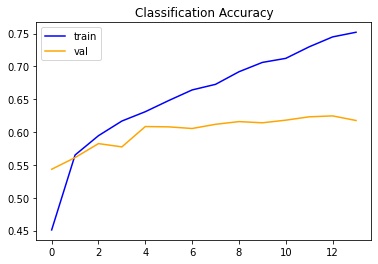

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

There is some over fitting and this may be the reason why the model does not have great performance


## 3.9 Model9: VGG transfer learning 2

for this model I will again use the vgg16 model but in this case I will set some parameters as trainable

In [ ]:
from tensorflow.keras.applications import vgg16
vgg = vgg16.VGG16(include_top=False, weights='imagenet',input_shape= (32,32,3))

In [ ]:
from tensorflow.keras.models import Model

output = vgg.layers[-1].output
new_output_layer = ks.layers.Flatten()(output)
vgg_model = Model(vgg.input, new_output_layer)

In [ ]:
vgg_model.trainable = True

trainable = False
for layer in vgg_model.layers:
  if layer.name=='block4_conv1':
    trainable = True

  layer.trainable = trainable

In [ ]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer type', 'Name of layer', 'Trainable?'])

,Layer type,Name of layer,Trainable?
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [ ]:
# Forming the last layers of the model 
model = ks.Sequential(name='VGG_TF2')

model.add(vgg_model)
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.4))
model.add(ks.layers.Dense(512, activation='relu', input_shape=(vgg_model.output_shape[1],)))
model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 1, 1, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1, 1, 512)         0         
                                                                 
 dense (Dense)               (None, 1, 1, 512)         262656    
                                                                 
 dense_1 (Dense)             (None, 1, 1, 256)         131328    
                                                                 
 dense_2 (Dense)             (None, 1, 1, 128)         32896     
                                                        

In [ ]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### Training


In [ ]:
from gc import callbacks
history = model.fit(x_train_scaled, y_train, epochs=20, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_scaled, y_val),
                    callbacks = [callback_loss, callback_accuracy])

Epoch 1/20
79/79 [==============================] - 19s 151ms/step - loss: 1.5906 - accuracy: 0.1005 - val_loss: 5.6325 - val_accuracy: 0.1009
Epoch 2/20
79/79 [==============================] - 9s 110ms/step - loss: 1.0930 - accuracy: 0.1009 - val_loss: 1.6602 - val_accuracy: 0.1013
Epoch 3/20
79/79 [==============================] - 9s 112ms/step - loss: 0.8955 - accuracy: 0.1007 - val_loss: 1.1350 - val_accuracy: 0.1011
Epoch 4/20
79/79 [==============================] - 9s 111ms/step - loss: 0.7906 - accuracy: 0.1008 - val_loss: 1.6631 - val_accuracy: 0.1007
Epoch 5/20
79/79 [==============================] - 9s 110ms/step - loss: 0.7053 - accuracy: 0.1010 - val_loss: 2.3110 - val_accuracy: 0.1003
Epoch 6/20
79/79 [==============================] - 9s 109ms/step - loss: 0.6517 - accuracy: 0.1012 - val_loss: 1.0768 - val_accuracy: 0.1014
Epoch 7/20
79/79 [==============================] - 9s 108ms/step - loss: 0.5925 - accuracy: 0.1010 - val_loss: 0.8059 - val_accuracy: 0.1014
Epoch

KeyboardInterrupt: ignored

### Evaluation


In [ ]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 76.790


Setting some layers of the vgg model as trainable improved the model considerably




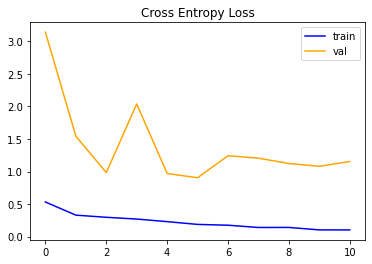

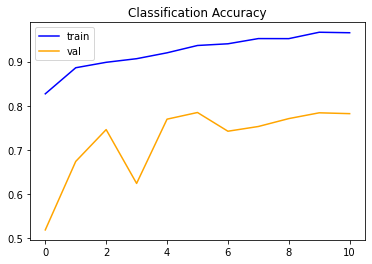

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

There is still a lot of overfitting, unfortunately we can't use data augmentation


## 3.10 Model10: Resnet transfer learning 

For this model I will use transfer learning to implement the resnet model on our data

In [ ]:
from tensorflow.keras.applications import resnet
resnet = resnet.ResNet101(include_top=False, weights='imagenet',input_shape= (32,32,3))

In [ ]:
resnet.summary()

In [ ]:
from tensorflow.keras.models import Model

output = resnet.layers[-1].output
new_output_layer = ks.layers.Flatten()(output)
resnet_model = Model(resnet.input, new_output_layer)

In [ ]:
resnet_model.trainable = True

trainable = False
for layer in resnet_model.layers:
  if layer.name=='conv5_block1_1_conv':
    trainable = True

  layer.trainable = trainable


In [ ]:
pd.set_option("display.max_rows",1000)
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer type', 'Name of layer', 'Trainable?'])

In [ ]:
resnet_model.output_shape

(None, 2048)

In [ ]:
# Forming the last layers of the model 
model = ks.Sequential(name="Resnet")

model.add(resnet_model)
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(0.4))
model.add(ks.layers.Dense(2048, activation='relu', input_shape=(2048,)))
model.add(ks.layers.Dense(1024, activation='relu'))
model.add(ks.layers.Dense(512, activation='relu'))
model.add(ks.layers.Dense(256, activation='relu'))
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(10, activation='softmax')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 2048)              42658176  
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_13 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                      

In [ ]:
#model optimizer
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_loss = EarlyStopping(monitor='val_loss', patience=5)
callback_accuracy = EarlyStopping(monitor='val_accuracy', patience=5)

### Training


In [ ]:
from gc import callbacks
history = model.fit(x_train_scaled, y_train, epochs=50, 
                    use_multiprocessing=False, batch_size= 512, 
                    validation_data=(x_val_scaled, y_val),
                    callbacks = [callback_loss, callback_accuracy])

Epoch 1/20
79/79 [==============================] - 25s 178ms/step - loss: 2.0575 - accuracy: 0.2438 - val_loss: 2.5645 - val_accuracy: 0.1139
Epoch 2/20
79/79 [==============================] - 10s 125ms/step - loss: 1.7958 - accuracy: 0.3516 - val_loss: 4.9172 - val_accuracy: 0.1025
Epoch 3/20
79/79 [==============================] - 11s 139ms/step - loss: 1.6967 - accuracy: 0.3953 - val_loss: 6.4127 - val_accuracy: 0.1025
Epoch 4/20
79/79 [==============================] - 11s 145ms/step - loss: 1.6253 - accuracy: 0.4226 - val_loss: 5.7270 - val_accuracy: 0.1039
Epoch 5/20
79/79 [==============================] - 10s 123ms/step - loss: 1.5736 - accuracy: 0.4438 - val_loss: 3.9284 - val_accuracy: 0.1062
Epoch 6/20
79/79 [==============================] - 10s 123ms/step - loss: 1.5232 - accuracy: 0.4632 - val_loss: 16.3619 - val_accuracy: 0.1099


### Evaluation


In [ ]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 10.710


In [ ]:
Model_scores[model.name] = np.round((model.evaluate(x_test_scaled, y_test, verbose=0)[1] * 100),2)

This model yields terrible result, thus I will not try to improve it further

# Evaluation of all the models


In [ ]:
score_df = pd.DataFrame(data = Model_scores.keys(), columns=["Model_name"])
score_df["Val_score"] = Model_scores.values()
score_df = score_df.sort_values(by="Val_score", ascending=False)
score_df


In [54]:
print(f'My best model is the {score_df.Model_name[0]} model with a validation accuracy score of {score_df.Val_score[0]}%')

My best model is the pute model with a validation accuracy score of 50%
